## Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('New_File.csv')
data.head()

6.1101   17.592
0  5.5277   9.1302
1  8.5186  13.6620
2  7.0032  11.8540
3  5.8598   6.8233
4  8.3829  11.8860

In [3]:
x=np.array(data.iloc[:,0:-1])
y=np.transpose([np.array(data.iloc[:,-1])])
print(np.shape(x))
print(np.shape(y))

(96, 1)
(96, 1)


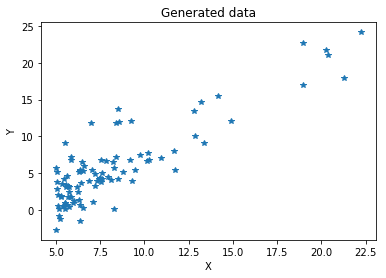

In [4]:
plt.figure(1)
plt.title("Generated data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x,y,'*')
plt.show()

In [5]:
def split_data(x,y,test_per):
    m=len(x)
    random_data=np.random.randint(0,m,m)
    #Number Of train set & test set 
    num_train_set = int((1-test_per)*m)
    num_test_set  = int(test_per*m)
    train_ind=random_data[0:num_train_set]
    #creating a array of zeros for the train dataset
    x_train=np.zeros((len(train_ind),1))
    y_train=np.zeros((len(train_ind),1))
    # x_train & y_train after the split 
    x_train = x[train_ind]
    y_train = y[train_ind]
    
    num_test_set=random_data[num_train_set::]
    #creating a array of zeros for the test dataset
    x_test=np.zeros((len(num_test_set),1))
    y_test=np.zeros((len(num_test_set),1))
    #x_test & y_test after the split
    x_test = x[num_test_set]
    y_test = y[num_test_set]
    return x_train,y_train,x_test,y_test

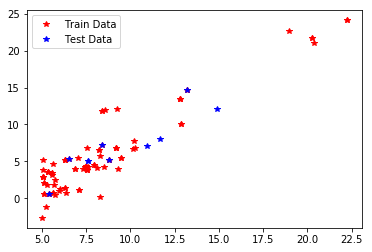

In [6]:
test_perc=0.1
x_train,y_train,x_test,y_test = split_data(x,y,test_perc)
#Plotting the graph x_train,y_train,x_test,y_test
plt.figure(2)
plt.plot(x_train,y_train,'r*',label='Train Data')
plt.plot(x_test,y_test,'b*',label='Test Data')
plt.legend()
plt.show()

In [7]:
(r,c)=np.shape(x_train)
x0=np.ones((1,r))
x_train=np.transpose(np.concatenate((x0,np.transpose(x_train))))  
print(np.shape(x_train))

(86, 2)


In [8]:
r,c=np.shape(x_test)
x_test=np.transpose(np.concatenate((np.ones((1,r)),np.transpose(x_test))))

In [9]:
r,c=np.shape(x_train)
theta=np.zeros((c,1))
alpha=0.01
num_iters=1500

In [10]:
def costfunction(x_train,y_train,theta):
    m=len(x_train)
    j=0
    h=np.matmul(x_train,theta)
    j=np.sum(((h-y_train)**2),axis=0)       
    return j/(2*m)


In [11]:
j1 = costfunction(x_train,y_train,theta)
print("Cost value is", j1)

Cost value is [35.03094458]


In [12]:
def gradientDescent(x_train,y_train,theta,alpha,num_iters):
    l=0
    J_history = []
    while l<num_iters:
        err=np.zeros((c,1))
        h=np.matmul(x_train,theta)
        err=np.sum(((h-y_train)*(x_train)),axis=0)
        err=np.transpose([err])
        cost=costfunction(x_train,y_train,theta)
        J_history.append(cost)
        theta=theta-alpha*(1/r)*err
        l=l+1
    return theta,J_history
    

In [13]:
thetas,J_history=gradientDescent(x_train,y_train,theta,alpha,num_iters)
print("Theta values are",thetas)

Theta values are [[-5.02081221]
 [ 1.31948982]]


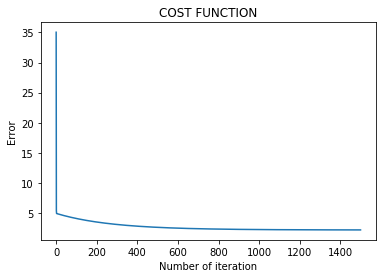

In [14]:
plt.figure(3)
plt.plot(J_history)
plt.title("COST FUNCTION")
plt.xlabel('Number of iteration')
plt.ylabel('Error')
plt.show()

In [15]:
yhat=np.matmul(x_train,thetas)
train_err=np.sum(np.abs(((y_train/max(y_train))-(yhat/max(yhat)))/len(yhat)))
accuracy=(1-train_err)*100
print("Training Error:{},\nAccuracy:{}".format(train_err,accuracy))

Training Error:0.06755656635966036,
Accuracy:93.24434336403397


In [16]:
yhat_test=np.matmul(x_test,thetas)
test_err=np.sum(np.abs(((y_test/max(y_test))-(yhat_test/max(yhat_test)))/len(yhat_test)))
print("Testing Error:{}".format(test_err))

Testing Error:0.10721385441186225


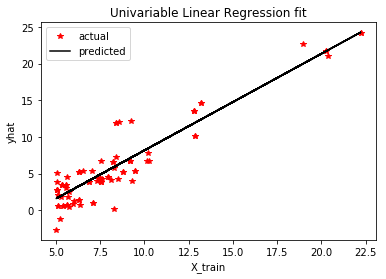

In [17]:
plt.figure(4)
plt.plot(x_train[:,1],y_train,'*r',label='x_train')
plt.plot(x_train[:,1],yhat,'-k',label='yhat')
plt.title('Univariable Linear Regression fit')
plt.xlabel('X_train')
plt.ylabel('yhat')
plt.gca().legend(('actual','predicted'))
plt.show()